In [ ]:
# installs
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import emoji as emoji

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vaccine_data = pd.read_csv("/content/drive/MyDrive/Major Project Data/vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
vaccine_data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 02:30PM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1:… https://t.co/F0WeHxW7oe,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,"18-44 #BBMP #Bengaluru #CovidVaccine Availability for 15/11 at 02:00PM\nFREE Slots \n#COVISHIELD - Dose1:1676, Dose2:… https://t.co/3k8SHHcVVd","['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 02:00PM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose… https://t.co/INCb38UKmA,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Ferrari, @hornets political activist, London is Blue 💙, Property developer, Aries♈",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccin

In [ ]:
print(vaccine_data.columns)
print(vaccine_data.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(116057, 16)


In [ ]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                116057 non-null  int64 
 1   user_name         116057 non-null  object
 2   user_location     116057 non-null  object
 3   user_description  116057 non-null  object
 4   user_created      116057 non-null  object
 5   user_followers    116057 non-null  int64 
 6   user_friends      116057 non-null  int64 
 7   user_favourites   116057 non-null  int64 
 8   user_verified     116057 non-null  bool  
 9   date              116057 non-null  object
 10  text              116057 non-null  object
 11  hashtags          116057 non-null  object
 12  source            116057 non-null  object
 13  retweets          116057 non-null  int64 
 14  favorites         116057 non-null  int64 
 15  is_retweet        116057 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
vaccine_data.drop(columns=['id'], inplace=True)

In [ ]:
vaccine_data = vaccine_data.drop_duplicates('text')
print(vaccine_data.shape)

(115849, 15)


In [ ]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
#def clean_tweet_text(text):
#    text = re.sub(r'@\w+', '', text)
#    text = re.sub(r'#', '', text)
#    text = re.sub(r'RT[\s]+', '', text)
#    text = re.sub(r'https?:\/\/\S+', '', text)
#    text = text.lower()
#    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
#vaccine_data['text'].transform(clean_tweet_text)
#vaccine_data.head()

In [ ]:
!pip install emoji


In [ ]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub(r"\d", "", tweet)#Remove http links
    tweet = re.sub(emoji.get_emoji_regexp(), "", tweet)
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower())
    return tweet

In [ ]:
# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
#vaccine_data['text'].transform(cleaner)

vaccine_data['text'] = vaccine_data['text'].map(lambda x: cleaner(str(x)))
vaccine_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid Russian vaccine is created to last - years …,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA , Canada , UK and …",['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"CovidVaccine States will start getting COVIDVaccine Monday , US says pakustv NYC Healthcare GlobalGoals …","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the , mark ... millions of people wait PfizerBioNTech Vaccine ! - The first U …","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [ ]:
# we do not care about the exact time of each tweet, we just want the date
#vaccine_data['date'] = pd.to_datetime(vaccine_data['date'])
#vaccine_data.head()

In [ ]:
#Subset of Dates
#from datetime import datetime
#start_date = '12/12/20'
#start_date = datetime.strptime(start_date, '%d/%m/%y')
#start_date
#nd_date = '01/06/21'
#end_date = datetime.strptime(end_date, '%d/%m/%y')
#end_date

In [ ]:
#mask = (vaccine_data['date'] >= start_date) & (vaccine_data['date'] <= end_date)

In [ ]:
#vaccine_data = vaccine_data.loc[mask]
#vaccine_data

In [ ]:
# we do not care about the exact time of each tweet, we just want the date
vaccine_data['date'] = pd.to_datetime(vaccine_data['date']).dt.date
vaccine_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid Russian vaccine is created to last - years …,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA , Canada , UK and …",['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"CovidVaccine States will start getting COVIDVaccine Monday , US says pakustv NYC Healthcare GlobalGoals …","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the , mark ... millions of people wait PfizerBioNTech Vaccine ! - The first U …","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [ ]:
vaccine_data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
228202,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15,+ URBAN Bengaluru CovidVaccine Availability for / at : PM FREE Slots PAID Slots COVISHIELD - Dose :…,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
228203,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15,"- BBMP Bengaluru CovidVaccine Availability for / at : PM FREE Slots COVISHIELD - Dose :, Dose :…","['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,1,False
228204,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15,- URBAN Bengaluru CovidVaccine Availability for / at : PM FREE Slots PAID Slots COVISHIELD - Dose …,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
228205,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Ferrari, @hornets political activist, London is Blue 💙, Property developer, Aries♈",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,They promote their Vaccines leaving out the stronger vaccine SputnikV,['SputnikV'],Twitter for Android,0,0,False
228206,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15,+ URBAN Bengaluru CovidVaccine Availability for / at : PM FREE Slots PAID Slots COVISHIELD - Dose :…,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False


In [ ]:
vaccine_data.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,1.158490e+05,115849.000000,1.158490e+05,115849.000000,115849.000000
mean,1.594820e+05,1387.750710,1.537447e+04,3.456379,15.505839
std,1.115311e+06,6970.271513,4.346030e+04,65.137923,254.309936
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.140000e+02,126.000000,2.670000e+02,0.000000,0.000000
50%,6.210000e+02,398.000000,2.185000e+03,0.000000,1.000000
75%,3.397000e+03,1149.000000,1.112800e+04,1.000000,3.000000
max,1.635305e+07,582461.000000,1.214813e+06,12294.000000,54017.000000


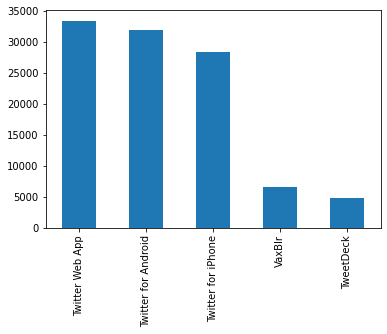

In [ ]:
# which device are people tweeting about the vaccine from?
vaccine_data['source'].value_counts().head(n=5).plot.bar()

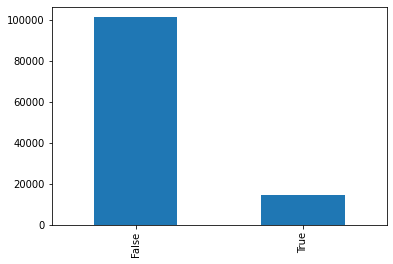

In [ ]:
vaccine_data['user_verified'].value_counts().head(n=10).plot.bar()


In [ ]:
#Creating a copy dataset for just verified users
vaccine_verified= vaccine_data[vaccine_data['user_verified'] == True]

In [ ]:
vaccine_data.shape

(115849, 15)

In [ ]:
vaccine_verified.shape

(14629, 15)

In [ ]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
vaccine_data.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
221427,This video fits the last almost years into minutes . At SputnikV we strongly believe that it is only through Va …,2021-11-11,Sputnik V,"Moscow, Russia",['SputnikV'],54017,12294
68358,"RDIF , Laboratorios Richmond launched production of SputnikV in Argentina , the first country in Latin America to ma …",2021-04-20,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine vaccines COVID Pfizer moderna VaccinesSaveLives vaccinated,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
66822,ICMR study shows COVAXIN neutralises against multiple variants of SARS - CoV - and effectively neutralises the doubl …,2021-04-21,ICMR,New Delhi,['COVAXIN'],11995,4851
76306,Argentina ' s actor breaks into a live TV to show his SputnikV vaccination certificate & amp ; express his gratitude . T …,2021-05-19,Sputnik V,"Moscow, Russia","['Argentina', 'SputnikV']",14412,2550
17118,"Got my jab . For the curious , it was Covaxin . Felt secure , will travel safely .",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
53045,I see it ’ s going around with signature cropped .... so here is the original :) covid vaccine pfizer moderna …,2021-04-12,dawnymock,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",10175,2299
7126,"New research published in Microbiology & amp ; Infectious Diseases , immunologist J . Bart Classen warns mRNA technology u …",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
24268,"Covaxin , made by Hyderabad - based Bharat Biotech International Limited , has been declared "" Safe , Immunogenic wi …",2021-03-09,Megh Updates 🚨,Turn on Notification 🔔,['Covaxin'],9458,2095
32826,A batch of fake Sputnik V vaccines was confiscated in Mexico . See this comparison of the genuine SputnikV with a f …,2021-03-18,Sputnik V,"Moscow, Russia",['SputnikV'],3473,1980


In [ ]:
vaccine_data.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
35,An immigrant Muslim couple find the COVID - Vaccine . CovidVaccine PfizerBioNTech Pfizervaccine PfizerProud,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2
293,UnitedStates : The Federal Aviation Administration ( FAA ) said Saturday it had approved the use of the …,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
25,No . of done . ThankYouNHS and PfizerBioNTech for making the CovidVaccine dream poss …,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus : Iran reports , new cases , deaths in the last hours Iran coronavirus PfizerBioNTech …",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3
298,UnitedStates : The Federal Aviation Administration ( FAA ) said Saturday it had approved the use of the …,2020-12-12,DD India,"New Delhi, India",['UnitedStates'],5,0
6,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA , Canada , UK and …",2020-12-12,Gunther Fehlinger,"Austria, Ukraine and Kosovo",['vaccination'],4,0
301,I am beyond relieved to share that I ’ ll be among the first to receive the CovidVaccine from PfizerBioNTech . Thank …,2020-12-12,"Taryn Schuelke, CT, CCLS","Houston, TX","['CovidVaccine', 'PfizerBioNTech']",4,2
18,. will rake in billions from its expensive CovidVaccine but refuses to cut the price for lowe …,2020-12-12,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK",['CovidVaccine'],3,3
16,UPDATED : YellowFever & amp ; COVID ImmunityPassports - Part Two SARSCoV PfizerBioNtech Britain December …,2020-12-12,STOPCOMMONPASS.ORG,Global,"['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']",2,2
21,Anyone wondering why day after PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol …,2020-12-12,"Richard Dunne, MD","Rochester, NY",['PfizerBioNTech'],2,0


# **Sentiment Analysis**

We will be using the TextBlob library to perform sentiment analysis on the tweets in our dataset. TextBlob provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. That said, there are numerous other packages with similar capabilities that are worth exploring, including sklearn, nltk, vader, allennlp, and more.

Let's see some short examples!

In [ ]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [ ]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [ ]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [ ]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
vaccine_data['polarity'] = vaccine_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
vaccine_data['subjectivity'] = vaccine_data['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
vaccine_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid Russian vaccine is created to last - years …,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA , Canada , UK and …",['vaccination'],Twitter Web App,0,4,False,-0.10,0.500000
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"CovidVaccine States will start getting COVIDVaccine Monday , US says pakustv NYC Healthcare GlobalGoals …","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,0.00,0.000000
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the , mark ... millions of people wait PfizerBioNTech Vaccine ! - The first U …","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.25,0.333333


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

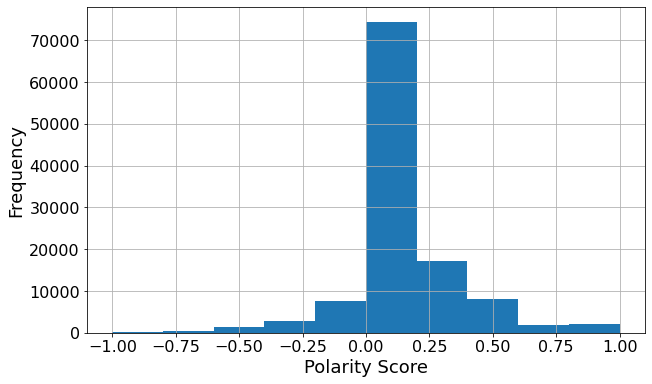

In [ ]:
fig = plt.figure(figsize=(10, 6))
vaccine_data['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

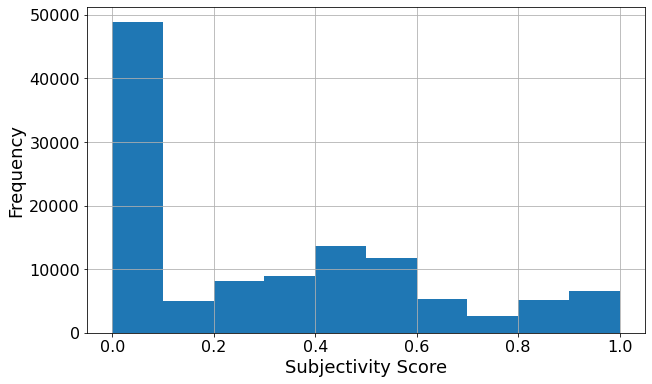

In [ ]:
fig = plt.figure(figsize=(10, 6))
vaccine_data['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# inspect the most negatively charged tweets
vaccine_data.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)


,text,polarity,subjectivity
0,Terrible . Modi propagandists will soon say he came up with formula for COVAXIN Why does the stop the worship,-1.0,1.000000
1,Get the Covaxin approved . Pathetic organisation . Covaxinapproval covaxin CovidVaccine,-1.0,1.000000
2,Outrageous ! The EU playing games again with people ’ s lives ! Petty Jealousy FakeNews Professor SarahGilbert led t …,-1.0,1.000000
3,"Even if the Covid picture in Turkey looks very grim , there are some signs of hope : vaccination is working ( eve …",-1.0,1.000000
4,Pathetic . Delaying Covaxin shows us your pathetic side . Covaxin CovidVaccineCovaxinapproval CovidVaccine,-1.0,1.000000
5,Man we gotta do something about the unvaccinated .. Holy cannoli this is horrible SuperSpreders of COVID are …,-1.0,1.000000
6,tx saline vaccines making the world sick ! FDA $ mrna moderna fraud !,-1.0,0.857143
7,"Pfizer and Moderna Also JandJ Get your filthy money - grubbing paws away from my daughters . Go ahead Fauci , Poke the Bear !",-1.0,1.000000
8,My nd shingles shot was horrible and I had no reaction to Moderna,-1.0,1.000000
9,This Government ' s administration ' s DESPERATION to cover up for BigPharma Pfizer and Moderna is DISGUSTING …,-1.0,1.000000


## **INSPECTING THE POLARITY OF TWEETS**

In [ ]:
# inspect the most positively charged tweets
vaccine_data.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Get my art printed on awesome products . Support me at Redbubble RBandME : findyourthing …,1.0,1.00
1,"All good , but we need approval from Work for it !! NO TO VACCINE DISCRIMINATION SputnikV …",1.0,0.60
2,"Sathyaraj Yesterday at this time , I got vaccinated by SputnikV . and there was impressive …",1.0,1.00
3,I ' m now fully vaccinated with the Moderna vaccine . I ' m thrilled at this reality !!! We ' ll see how my side effe …,1.0,0.70
4,Nice to meet you . I am FullyVaccinated !!! Moderna modernavaccine wearamask VaccineForAll,1.0,1.00
5,very happy in this moment moderna,1.0,1.00
6,":. Hi my friend , very welcome ! Thank you for sharing ! Coimbra Portugal coimbrasummit SputnikV is …",1.0,1.00
7,Best birthday gift . FullyVaccinated moderna,1.0,0.30
8,"tx He should have gotten a pfizer vaccine instead , it is % efficacy and is best for all o …",1.0,0.30
9,I ' ve been fully vaccinated for over weeks and feel great ! Moderna,1.0,0.75


In [ ]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
vaccine_data.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,BREAKING NEWS : SputnikV approved for emergency use in India . Sputnikvaccine,0.0,0.0
1,"When UK , Spain have approved Covaxin , UAE has conditionally approved it for those with residential permits .…",0.0,0.0
2,got my st dose . In sha Allah nd dose on nd june Sinovac,0.0,0.0
3,The th batch of China ' s Sinovac COVID - vaccine arrived in Cambodia on Sunday . OnlyTogether …,0.0,0.0
4,"Thank You City of Imus ! nd Shot done Sinovac @ Imus , Cavite",0.0,0.0
5,COVID -: Sinovac vaccine arrives in Oman Priority will be given to inoculate Chinese community residing in Sult …,0.0,0.0
6,"nd dose completed . I conquered my fear , again . Thank you , Lord . covidvaccine bakunadoprotektado resbakuna …",0.0,0.0
7,Bravo Heard that Sinovac h the thinking ability Israel,0.0,0.0
8,Got Second Jab Today Covaxin,0.0,0.0
9,Pakistan International Airlines PIA on Sunday transported another one million doses of Sinovac vaccines fr …,0.0,0.0


In [ ]:
# inspect the most objective tweets
vaccine_data.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,"Rubber bits likely tainted Moderna vaccine in Okinawa shots | The Asahi Shimbun : Breaking News , Japan News and …",0.0,1.0
1,Rise in Fake News Tarnishing Venezuela ' s Mass Vaccination Campaign against COVID SistemaPatria HeroicBattle …,-0.5,1.0
2,"Sinopharm yrs + From th , Monday Residents ( Temp or permanent ) of Colombo - ONLY ** born and onwards onl …",0.0,1.0
3,Sorry to hear this experience of your friend who was denied the Sinopharm . Where did this happen ?,-0.5,1.0
4,Nice LasVacunasSalvanVidas Sinopharm Vacunatón,0.6,1.0
5,"FINALLY , vaccinated with Sinopharm st dose today ..!! Thank you SriLanka for vaccinating below and specia …",0.0,1.0
6,That ' s horrible .. CovishieldVaccine covaxin BlackMarketing,-1.0,1.0
7,Russia has already introduced its own vaccinationcertificate for COVID vaccination with SputnikV …,0.6,1.0
8,excellent protection against severe COVID with inactivated virus vaccine ( Sinopharm ). DeltaVariant Effecti …,1.0,1.0
9,Vaccination is only possible way to check virus spread .. Everyone should vaccinate . Covaxin,0.0,1.0


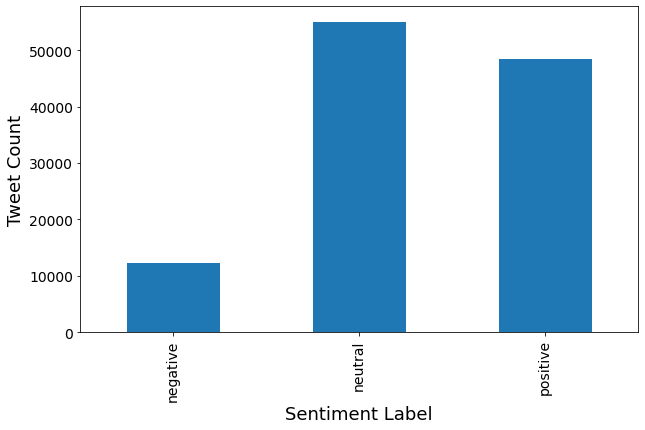

<Figure size 432x288 with 0 Axes>

In [ ]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [vaccine_data['polarity'].between(-1, -0.01), vaccine_data['polarity'].between(-0.01, 0.01), vaccine_data['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
vaccine_data['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
vaccine_data['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

# **Time-Series Sentiment Analysis**

In [ ]:
# let's inspect how many tweets there were with respect to time
timeline = vaccine_data.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()
# fig.write_image("./figures/tweet_freq_over_time.png")

In [ ]:
timeline = vaccine_data.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = vaccine_data.groupby(['date']).count().reset_index()['is_retweet']
timeline = timeline[['date', 'count', 'polarity', 'is_retweet', 'user_favourites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

,date,count,polarity,is_retweet,user_favourites,subjectivity
0,2020-12-12,38,0.034952,0.0,13251.026316,0.227801
1,2020-12-13,52,0.054975,0.0,15904.846154,0.265312
2,2020-12-14,83,0.127115,0.0,20756.795181,0.284168
3,2020-12-15,87,0.090534,0.0,27674.862069,0.269509
4,2020-12-16,78,0.103379,0.0,12899.589744,0.254000
...,...,...,...,...,...,...
314,2021-11-19,433,0.101279,0.0,14862.838337,0.297700
315,2021-11-20,384,0.127723,0.0,19340.265625,0.316000
316,2021-11-21,295,0.141235,0.0,14966.671186,0.314265
317,2021-11-22,328,0.136318,0.0,10718.310976,0.295950


In [ ]:
timeline.sort_values(by='polarity', ascending=False)

,date,count,polarity,is_retweet,user_favourites,subjectivity
219,2021-08-13,813,0.229544,0.0,11065.057811,0.334822
12,2020-12-24,70,0.191530,0.0,6460.057143,0.331212
31,2021-01-12,52,0.182608,0.0,8592.423077,0.271700
263,2021-09-26,108,0.175800,0.0,9746.148148,0.467159
40,2021-01-21,92,0.175587,0.0,10735.565217,0.292541
...,...,...,...,...,...,...
124,2021-04-15,880,0.055168,0.0,18440.626136,0.267295
1,2020-12-13,52,0.054975,0.0,15904.846154,0.265312
35,2021-01-16,82,0.042498,0.0,12105.609756,0.268212
0,2020-12-12,38,0.034952,0.0,13251.026316,0.227801


In [ ]:
vaccine_data[vaccine_data['date'].astype(str) == '2020-12-24'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']].head(15)

,user_location,date,text,hashtags,polarity,subjectivity,sentiment
1123,Serbia,2020-12-24,Serbian PM Ms Brnabic Receiving PfizerBioNTech vaccine,"['Serbian', 'PfizerBioNTech']",0.000000,0.000000,neutral
1125,Divine Spirit,2020-12-24,LETHAL INJECTION PfizerBioNTech pfizercovidvaccine PotassiumChloride LethalInjection,"['PfizerBioNTech', 'pfizercovidvaccine', 'PotassiumChloride', 'LethalInjection']",0.000000,0.000000,neutral
1128,"Dubai, UAE",2020-12-24,"COVID : Over , in UK get first PfizerBioNTech vaccine dose UAE Dubai DXB","['COVID19', 'UK', 'PfizerBioNTech', 'vaccine', 'UAE', 'Dubai', 'DXB']",0.250000,0.333333,positive
1129,United Arab Emirates,2020-12-24,"COVID : Over , in UK get first PfizerBioNTech vaccine dose","['COVID19', 'UK', 'PfizerBioNTech', 'vaccine']",0.250000,0.333333,positive
1130,"Santa Barbara, CA",2020-12-24,How effective are the PfizerBioNTech and Moderna COVID Vaccines ? More info :,"['PfizerBioNTech', 'Moderna', 'COVID19']",0.550000,0.650000,positive
1131,Narnia,2020-12-24,The PfizerBioNTech vaccine is not licensed for pregnant women in the uk !,"['PfizerBioNTech', 'uk']",0.416667,0.500000,positive
1132,Egypt,2020-12-24,Egypt ordered mln doses of PfizerBioNTech and mln doses of AstraZeneca oxford COVID Vac ... via …,"['Egypt', 'PfizerBioNTech', 'AstraZeneca', 'oxford', 'COVID19']",0.000000,0.000000,neutral
1133,"Norwich, England",2020-12-24,What a wonderful Christmas present ! Thank you to - completely painless ! PfizerBioNTech …,['PfizerBioNTech'],0.375000,0.466667,positive
1134,"Toronto, ON",2020-12-24,"Mexico is the first country in Latin America , a region hard hit by Covid to begin delivering vaccines . A head nurs …",['Covid'],-0.020833,0.437500,negative
1135,Nottingham,2020-12-24,"• More than , people receive first dose of Pfizer / BioNTech vaccine in UK CovidVaccine PfizerBioNTech …","['CovidVaccine', 'PfizerBioNTech']",0.375000,0.416667,positive


In [ ]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [ ]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(vaccine_data, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(vaccine_data[vaccine_data['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['is_retweet']
    timeline = timeline[['date', 'count', 'polarity', 'is_retweet', 'user_favourites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline


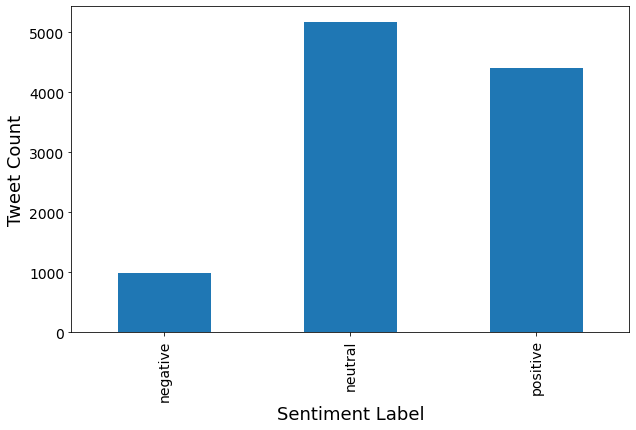

<Figure size 432x288 with 0 Axes>

In [ ]:
pfizy_df, pfizy_timeline = filter_by_vaccy(vaccine_data, ['pfizer', 'biontech'])
# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
pfizy_df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

In [ ]:
pfizy_df['sentiment'].value_counts()

neutral     5172
positive    4399
negative     983
Name: sentiment, dtype: int64

In [ ]:
pfizy_df.sort_values(by='retweets', ascending=False)[['text', 'hashtags', 'retweets', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,hashtags,retweets,polarity,subjectivity
0,What do you need to know about PfizerBioNTech COVID - vaccine ? COVID CovidVaccine,"['PfizerBioNTech', 'COVID19', 'CovidVaccine']",389,0.000000,0.000000
1,What do you need to know about PfizerBioNTech COVID - vaccine ? COVID CovidVaccine,"['PfizerBioNTech', 'COVID19', 'CovidVaccine']",389,0.000000,0.000000
2,Welcoming the st COVIDvaccines to tonight ! The st K doses of PfizerBioNTech are arriving across the cou …,"['COVID19vaccines', 'PfizerBioNTech']",284,0.000000,0.000000
3,Welcoming the st COVIDvaccines to tonight ! The st K doses of PfizerBioNTech are arriving across the cou …,"['COVID19vaccines', 'PfizerBioNTech']",284,0.000000,0.000000
4,The U . S . Food and Drug Administration on Friday added a warning to patient and provider fact sheets for the Pfizer …,['Pfizer'],145,0.000000,0.000000
5,". , during Covid update , says Pfizer has confirmed they will be moving up million vaccine doses …","['Covid19', 'Pfizer']",131,0.400000,1.000000
6,Did you know that In Turkey at this moment . Ambulance are driving through every community offering Pfizer …,['Pfizer'],122,0.000000,0.000000
7,The Western media deliberately down played or ignored the Russian coronavirus vaccine . Its now all about Pfizer …,"['coronavirus', 'Pfizer']",115,-0.051852,0.096296
8,A - year - old child has died following the Pfizer jab after her mother put her forward as a Guinea pig .…,['Pfizer'],105,0.050000,0.150000
9,LETHAL INJECTION PfizerBioNTech pfizercovidvaccine PotassiumChloride LethalInjection,"['PfizerBioNTech', 'pfizercovidvaccine', 'PotassiumChloride', 'LethalInjection']",104,0.000000,0.000000


In [ ]:
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(10554, 18)


In [ ]:
moderna_df, moderna_timeline = filter_by_vaccy(vaccine_data, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(25434, 18)


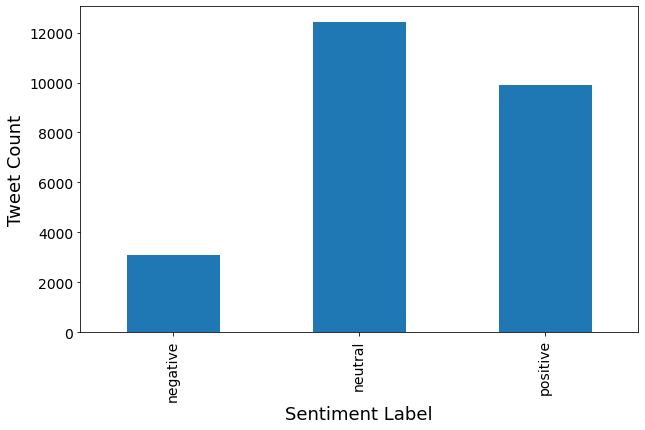

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
moderna_df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

In [ ]:
moderna_df['sentiment'].value_counts()

neutral     12429
positive     9897
negative     3108
Name: sentiment, dtype: int64

In [ ]:
moderna_df.sort_values(by='retweets', ascending=False)[['text', 'hashtags', 'retweets', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,hashtags,retweets,polarity,subjectivity
0,CANCER PATIENTS NEED MODERNA VACCINE — reminder to MultipleMyeloma & amp ; other cancer patients — Moderna vaccine offers …,"['MultipleMyeloma', 'Moderna']",1217,-0.0125,0.1875
1,Individuals who received Moderna as their primary series + months earlier are eligible for a booster if they are :…,['Moderna'],936,0.2000,0.5000
2,Japan ' s health ministry says foreign materials were found in some portions of the unused doses of Moderna Inc .' s …,['Moderna'],603,-0.1250,0.1250
3,Well this is interesting ... Who would have predicted that the Furin Cleavage Site in a Moderna patent matches * ex …,['Moderna'],493,0.5000,0.5000
4,"Japan is suspending . million doses of the Moderna vaccine for COVID - over concerns of contamination , after f …","['Moderna', 'vaccine']",473,0.0000,0.0000
5,Covid booster : be aware COVID Moderna,"['COVID19', 'Moderna']",446,0.2500,0.2500
6,Zuellig Pharma said in a statement on Monday that only . million Moderna doses will arrive between October and …,['Moderna'],409,0.0000,1.0000
7,"The next round of experimental mRNA genetic injections from Moderna . Zero mid to long - term testing , animal testing …",['Moderna'],362,-0.0300,0.2400
8,"Viet Nam received today ,, doses of Moderna vaccine donated to the COVAX Facility by the States Go …","['Moderna', 'COVAX']",339,0.0000,0.0000
9,I am the proud recipient of . doses of the Moderna COVID vaccine . There is a side effect that I find imperativ …,"['Moderna', 'COVID', 'vaccine']",253,0.8000,1.0000


In [ ]:
astra_df, astra_timeline = filter_by_vaccy(vaccine_data, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=False)[['text', 'hashtags', 'retweets', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,hashtags,retweets,polarity,subjectivity
0,Gotta admit that was absolutely perfect timing with the vaccine . AstraZeneca is suspended in as of today for u …,"['vaccine', 'AstraZeneca']",0,1.000,1.00
1,Vaxxed . Fully vaxxed . I ’ m so happy I could cry … THANK YOU !! covid vaccine astrazeneca …,"['covid19', 'vaccine', 'astrazeneca']",0,1.000,1.00
2,The UK has one of the best vaccine distributions . Everyone blocking the AstraZeneca vaccine will be begging us for …,['AstraZeneca'],1,1.000,0.30
3,I don ’ t want to be judgmental . But . AstraZeneca CovidVaccine Scientists & amp ; physicians say the best vaccine is the …,"['AstraZeneca', 'CovidVaccine']",1,1.000,0.30
4,Wish me good luck ; I ’ m going to begin playing the vaccineslots to get my st dose ! midnight COVID AstraZeneca …,"['vaccineslots', 'midnight', 'COVID19', 'AstraZeneca']",0,0.875,0.60
5,We are so proud to have had the AZ vaccine . To us we are privileged to have received the vaccine . AstraZeneca …,['AstraZeneca'],0,0.800,1.00
6,"We are proud to share that yesterday , we crossed + shots of Covid - Vaccine GetVaccinated AstraZeneca …","['GetVaccinated', 'AstraZeneca']",1,0.800,1.00
7,Alright . I got the J & amp ; J vax . Now leave me alone lol . COVIDAus DeltaPlusVariant JohnsonVariant AstraZeneca …,"['COVID19Aus', 'DeltaPlusVariant', 'JohnsonVariant', 'AstraZeneca']",0,0.800,0.70
8,Telangana has crossed crore vaccinations today . Proud COVIDVaccine IndiaFightsCorona AstraZeneca …,"['Telangana', 'Proud', 'COVID19Vaccine', 'IndiaFightsCorona', 'AstraZeneca']",1,0.800,1.00
9,st thank you for responce and great respect for what you are and stand .. But AstraZeneca blood c …,['AstraZeneca'],0,0.800,0.75


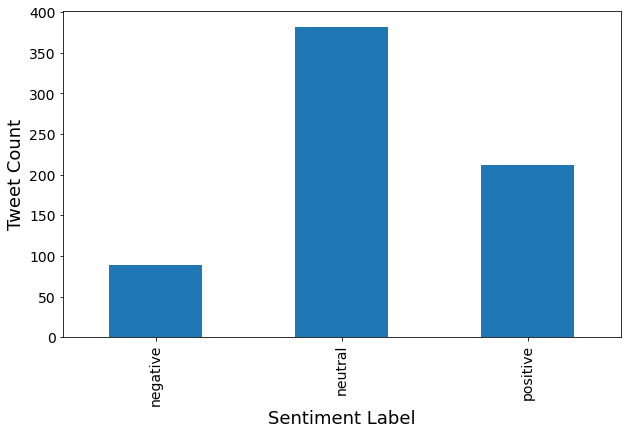

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
astra_df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

In [ ]:
astra_df['sentiment'].value_counts()

neutral     382
positive    212
negative     89
Name: sentiment, dtype: int64

In [ ]:
print(astra_df.shape)
fig = px.bar(astra_timeline, x='date', y='count', color='polarity')
fig.show()

(683, 18)


# **Simple WordCloud**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 499.5, -0.5)

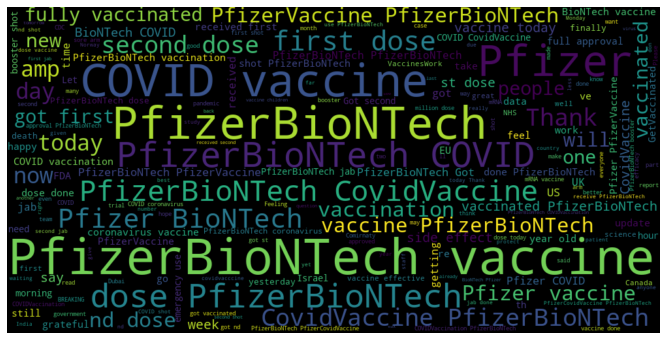

In [ ]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

# **Proper Processing of Text for WordCloud**

In [ ]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)"

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)"

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)"

# Reusable function to generate word clouds
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))

    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#   plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words

def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()

    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]

    # Get the top 10% of all words. This may include "misspelled" words
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words
    misspelled = spell.unknown(doc)

    # Accept the correctly spelled words and top_n words
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]

    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])

    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))

    return clean_words

def get_log_likelihood(doc1, doc2):
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }

    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }

    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }

    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud


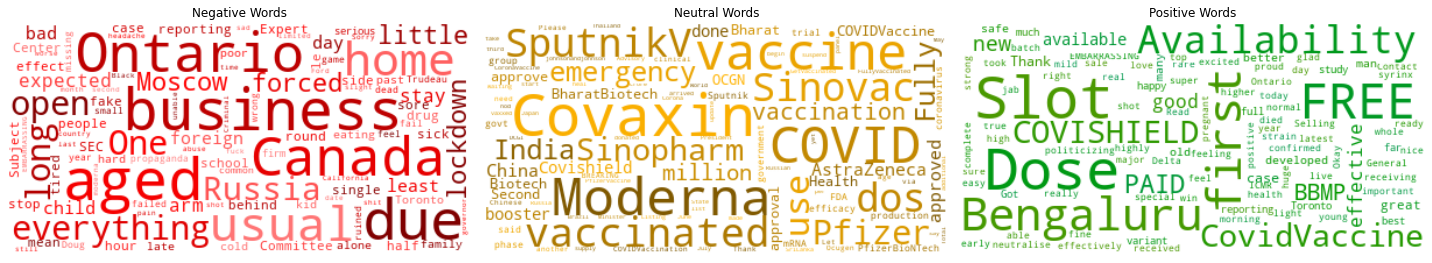

In [ ]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = vaccine_data
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")


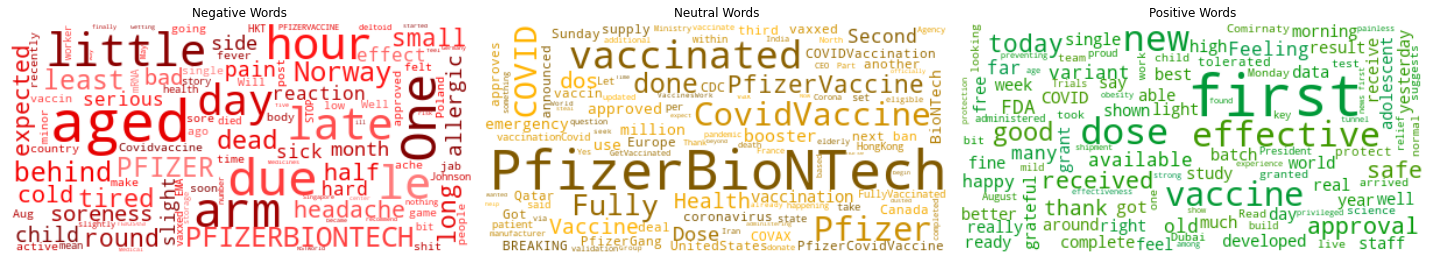

In [ ]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizy_sentiment_wordclouds.png", bbox_inches="tight")

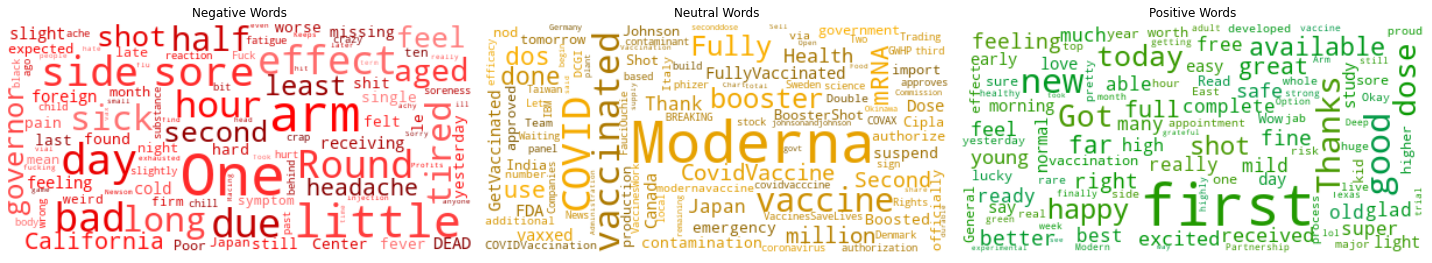

In [ ]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("moderna_sentiment_wordclouds.png", bbox_inches="tight")

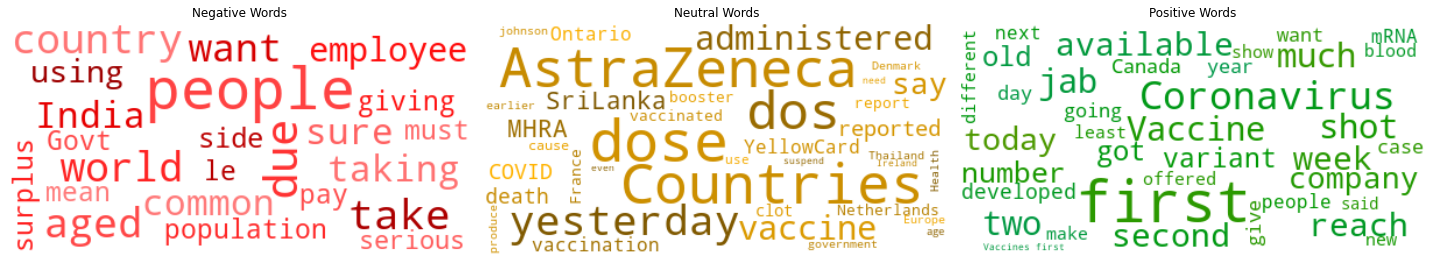

In [ ]:
wordcloud_df = astra_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("astra_sentiment_wordclouds.png", bbox_inches="tight")
